In [2]:
import ast
import pandas as pd
import seaborn as sns 
from datasets import load_dataset
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter

# Loading the Dataset 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Initial Clean-up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
# Countries of interest: UK, France, Netherlands, Germany, Belgium

countries = ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Belgium']

# Role of interest: 'Data Analyst'

df_da_eu = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].copy()

In [19]:
df_da_eu['job_posted_month_num'] = df_da_eu['job_posted_date'].dt.month


In [5]:
df_da_eu_explode = df_da_eu.explode('job_skills')

In [6]:
df_da_eu_piv = df_da_eu_explode.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0)
df_da_eu_piv

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,wsl,yarn,zoom
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,57,2,107,4,2,1,0,2,0,0,...,1,2,33,0,183,0,0,1,3,11
2,57,0,76,9,0,4,0,6,0,0,...,0,0,22,0,124,1,0,0,1,8
3,75,0,70,16,0,9,0,1,1,0,...,1,0,27,0,117,0,0,0,2,7
4,45,1,67,2,0,3,0,1,0,0,...,1,3,20,0,118,0,0,0,0,4
5,54,5,50,3,0,3,0,1,0,0,...,0,4,8,0,97,0,1,0,0,4
6,56,1,41,7,0,2,0,0,1,0,...,1,4,16,0,112,0,5,0,0,3
7,51,0,36,2,0,1,0,2,3,0,...,1,2,17,0,115,0,0,0,0,5
8,26,0,35,2,0,0,0,1,0,0,...,0,3,19,3,110,0,0,0,1,3
9,16,0,51,3,0,7,2,6,3,0,...,1,0,17,0,134,0,1,0,0,2


In [7]:
df_da_eu_piv.loc['Total'] = df_da_eu_piv.sum()
df_da_eu_piv

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,wsl,yarn,zoom
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,57,2,107,4,2,1,0,2,0,0,...,1,2,33,0,183,0,0,1,3,11
2,57,0,76,9,0,4,0,6,0,0,...,0,0,22,0,124,1,0,0,1,8
3,75,0,70,16,0,9,0,1,1,0,...,1,0,27,0,117,0,0,0,2,7
4,45,1,67,2,0,3,0,1,0,0,...,1,3,20,0,118,0,0,0,0,4
5,54,5,50,3,0,3,0,1,0,0,...,0,4,8,0,97,0,1,0,0,4
6,56,1,41,7,0,2,0,0,1,0,...,1,4,16,0,112,0,5,0,0,3
7,51,0,36,2,0,1,0,2,3,0,...,1,2,17,0,115,0,0,0,0,5
8,26,0,35,2,0,0,0,1,0,0,...,0,3,19,3,110,0,0,0,1,3
9,16,0,51,3,0,7,2,6,3,0,...,1,0,17,0,134,0,1,0,0,2


In [8]:
df_da_eu_piv = df_da_eu_piv[df_da_eu_piv.loc['Total'].sort_values(ascending=False).index].copy()
df_da_eu_piv.drop('Total', inplace=True)

In [9]:
df_da_eu_piv

job_skills,sql,python,excel,power bi,tableau,r,sas,azure,sap,vba,...,tidyr,nuix,mattermost,blazor,mlr,esquisse,nuxt.js,next.js,delphi,twilio
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,2000,1273,1231,1037,888,614,714,262,246,198,...,0,0,0,0,0,0,1,0,0,0
2,1646,1015,1012,862,766,479,556,232,217,200,...,0,0,0,0,0,0,0,0,0,0
3,1574,1054,884,793,706,513,558,229,213,181,...,0,0,0,1,0,0,0,0,0,0
4,1417,978,805,764,571,437,536,231,211,156,...,0,0,0,0,0,0,0,0,0,0
5,1243,823,758,646,505,355,370,209,182,148,...,0,0,0,0,0,0,0,0,0,1
6,1393,940,820,732,536,403,356,227,198,136,...,1,0,0,0,0,0,0,0,0,0
7,1422,918,894,867,545,426,360,279,229,136,...,0,0,0,0,0,0,0,0,0,0
8,1240,817,738,697,534,384,330,244,229,102,...,0,0,0,0,0,0,0,0,0,0
9,1396,887,848,772,553,436,292,236,220,146,...,0,1,0,0,0,0,0,0,0,0


In [10]:
da_totals = df_da_eu.groupby('job_posted_month_num').size()
da_totals

job_posted_month_num
1     4514
2     3695
3     3519
4     3177
5     2786
6     3199
7     3193
8     2768
9     3145
10    3538
11    3139
12    2673
dtype: int64

In [11]:
df_da_eu_percent = df_da_eu_piv.div(da_totals/100, axis=0)

In [12]:
df_da_eu_percent = df_da_eu_percent.reset_index()
df_da_eu_percent['job_posted_month'] = df_da_eu_percent['job_posted_month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b')) 
df_da_eu_percent = df_da_eu_percent.set_index('job_posted_month')
df_da_eu_percent = df_da_eu_percent.drop(columns='job_posted_month_num')

In [13]:
df_plot = df_da_eu_percent.iloc[:, :5]

sns.lineplot(
    data=df_plot,
    dashes=False,
    palette='tab10',
)
sns.set_theme(style='ticks')
sns.despine()
plt.title('Top Skills for Data Analysts in the NW EU')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

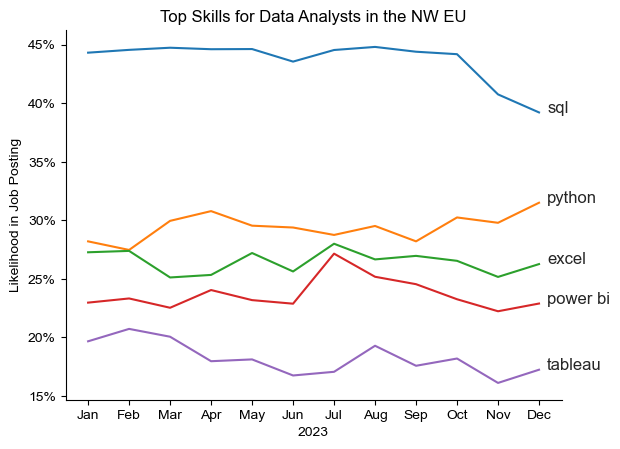